# Objective:
Goal is to classify the patients into the respective labels using the attributes from
their voice recordings

# Attribute Information:
__name__ - ASCII subject name and recording number<br>
__MDVP:Fo(Hz)__ - Average vocal fundamental frequency<br>
__MDVP:Fhi(Hz)__ - Maximum vocal fundamental frequency<br>
__MDVP:Flo(Hz)__ - Minimum vocal fundamental frequency<br>
__MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP__ - Several measures of variation in fundamental frequency
__MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,S
himmer:DDA__ - Several measures of variation in amplitude<br>
__NHR,HNR__ - Two measures of ratio of noise to tonal components in the voice<br>
__RPDE,D2__ - Two nonlinear dynamical complexity measures<br>
__DFA__ - Signal fractal scaling exponent<br>
__spread1,spread2,PPE__ - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)<br>
__status__ - Health status of the subject (one) - Parkinson's, (zero) - healthy<br>


# Dataset:
Data-Parkinsons.csv

# Steps and tasks:


# 1. Load the dataset


### Import Libraries and load dataset

In [9]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn import tree
from os import system
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
parkinson_df = pd.read_csv('Data-Parkinsons.csv')

### Print 10 samples from the dataset

In [6]:
parkinson_df.head(10)
#0s signify a lot of missing values

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

# 2. It is always a good practice to eye-ball raw data to get a feel of the data in  terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard

### Print the datatypes of each column and the shape of the dataset

In [49]:
parkinson_df.shape

(195, 24)

<font color=blue>Given data has total 195 rows and 24 columns</font>

In [50]:
parkinson_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

<font color=blue>__status__ - is the target classification attribute to classify the patients into the respective labels using the attributes from their voice recordings. subject (one) - Parkinson's, (zero) - healthy<br> 
Except name and status all other attributes are numerical</font>

### Dispalying the descriptive statistics describe each attribute

In [51]:
parkinson_df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

### Checking Null or Empty Values (Data Cleaning)

In [52]:
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

<font color=blue>Total 24 attributes where 22 are numerical and one (status) is required classification binary variable and other one is (name) object type which is unique</font>

In [53]:
parkinson_df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<font color=blue>Data doesn't contain any null values</font>



### Label Encoder/One Hot Encoder
<font color=blue>Encoding the Categorical values into numerical values is not required in this dataset. Because all values we have floating type only. we have name column as a categorical values but we are not going to use that column in model prediction.<br>
So no need to apply label encoding...</font>

### Drop name from the dataframe

In [7]:
parkinson_df_updated = parkinson_df.drop(["name"],axis=1)

In [8]:
parkinson_df_updated.groupby("status").agg({'status': 'count'})

status
status        
0           48
1          147

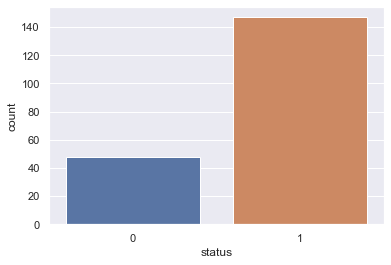

In [56]:
sns.countplot(x='status',data=parkinson_df_updated)

<font color=blue>This represents the distribution of status variable in the given data</font>

## 3. Using univariate & bivariate analysis to check the individual attributes for their basic  statistics such as central values, spread, tails, relationships between variables etc. mention your observations 

### Univariate Distribution & Analysis using Histograms and the Boxplots

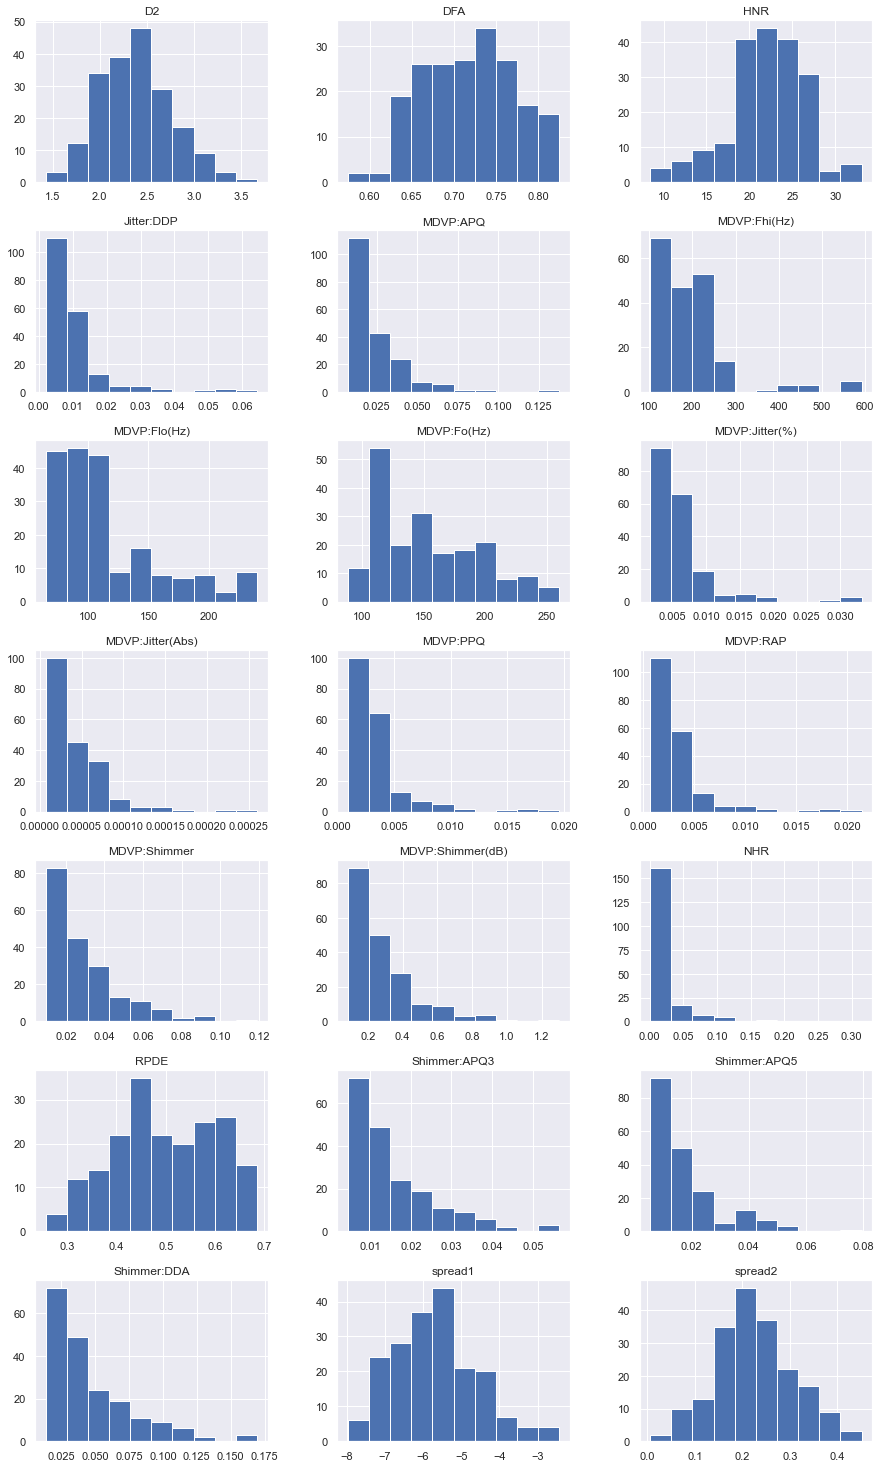

In [57]:
columns = list(parkinson_df_updated.drop(["status"],axis=1))[0:-1] 
parkinson_df_updated[columns].hist(bins=10, figsize=(15,30), layout=(8,3)); 

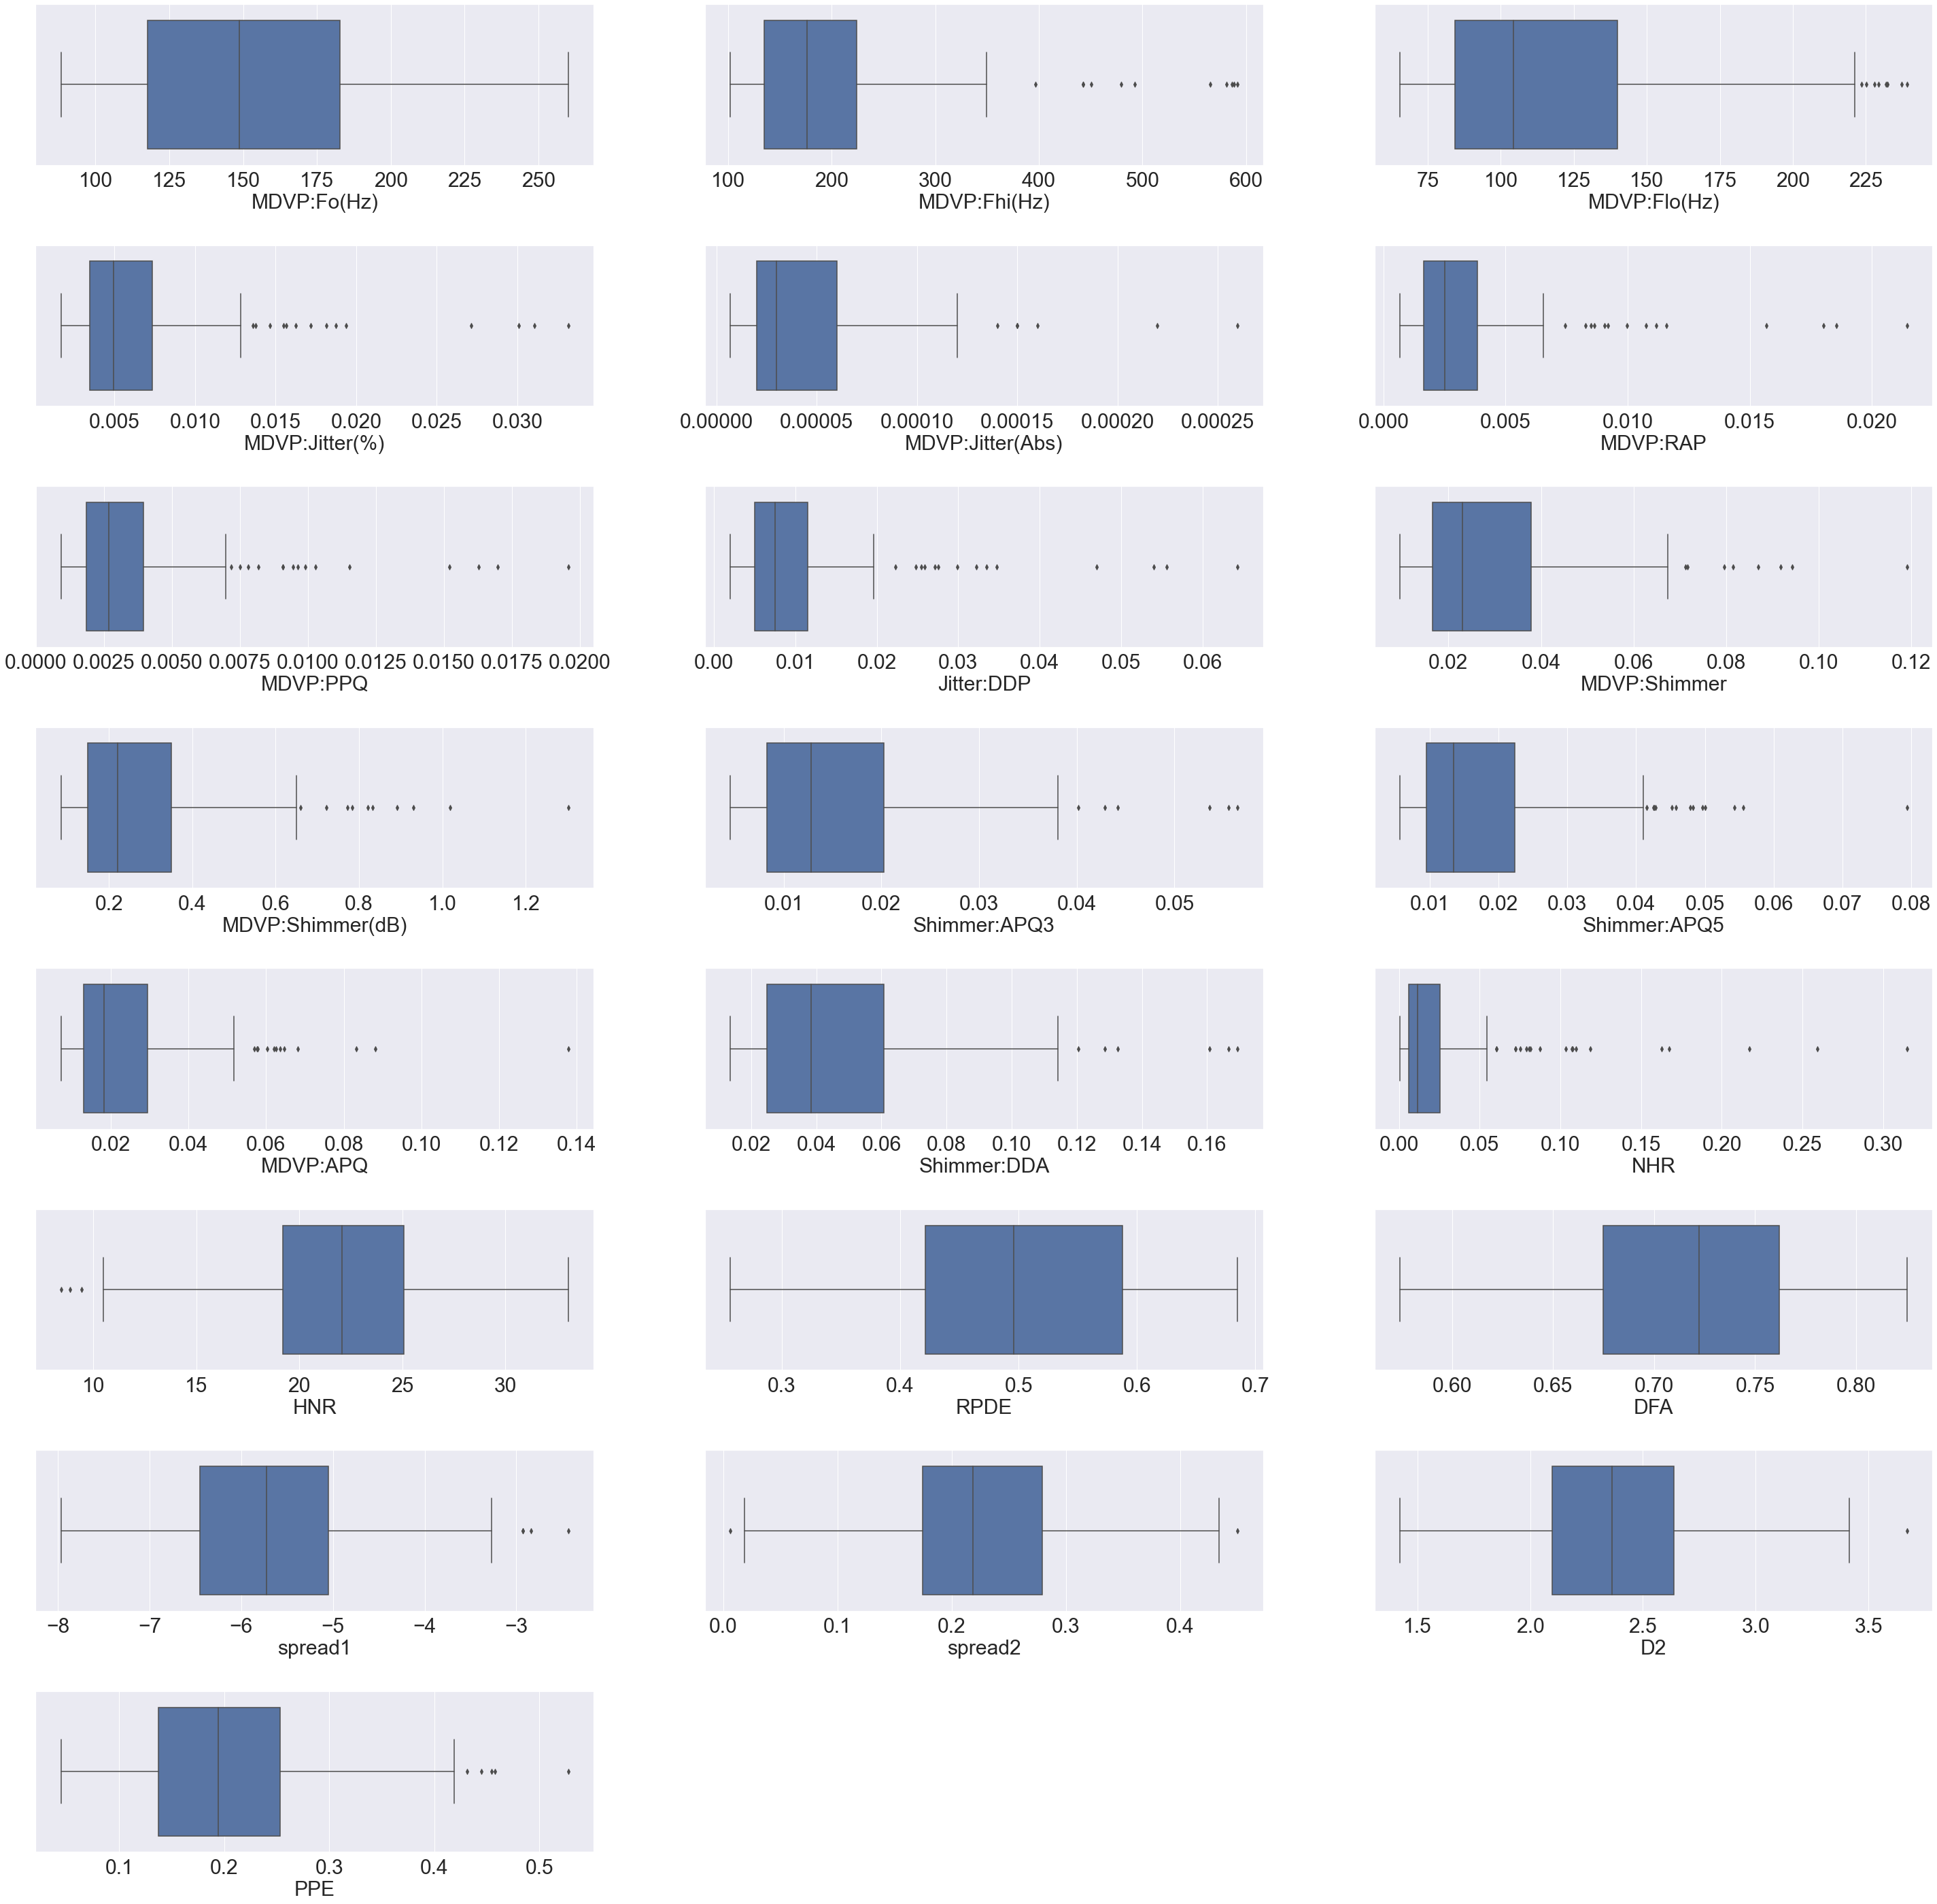

In [58]:
plt.figure(figsize= (50,50))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
i=1
for feature in parkinson_df_updated.drop(["status"],axis=1).columns: # Loop through all columns in the dataframe
    plt.subplot(8,3,i)
    b = sns.boxplot(x= parkinson_df_updated[feature])
    b.set_xlabel(feature,fontsize=30)
    b.tick_params(labelsize=30)
    i=i+1

<font color=blue>__MDVP:Fo(Hz)__         - Seems Evenly Distributed and most data is in between 125 to 175 and doesn't have outliers<br>__MDVP:Fhi(Hz)__        - Seems Evenly Distribute and most data is in the range between 50 and 250 and has outliers<br>__MDVP:Flo(Hz)__        - Seems Right Skewed and most of the data in between 75 to 150 and has outliers<br>__MDVP:Jitter(%)__      - Seems Right Skewed and most of the data in between 0.005 to 0.01 and has outliers<br>__MDVP:Jitter(Abs)__    - Seems Right Skewed and has outliers<br>__MDVP:RAP____            - Seems Right Skewed and has outliers<br>__MDVP:PPQ__            - Seems Right Skewed and has outliers<br>__Jitter:DDP__          - Seems Right Skewed and has outliers<br>__MDVP:Shimmer__        - Seems Right Skewed and has outliers<br>__MDVP:Shimmer(dB)__    - Seems Right Skewed and has outliers<br>__Shimmer:APQ3__        - Seems Right Skewed and has outliers<br>__Shimmer:APQ5__        - Seems Right Skewed and has outliers<br>__MDVP:APQ__            - Seems Right Skewed and has outliers<br>__Shimmer:DDA__         - Seems Right Skewed and has outliers<br>__NHR__                 - Seems Right Skewed and has high volume of outliers<br>__HNR__                 - Seems Evenly Distributed and very less outliers<br>__RPDE__                - Seems Right Skewed but no outliers<br>__DFA__                 - Seems Left Skewed but no outliers<br>__spread1__             - Seems Right Skewed and has outliers<br>__spread2__             - Seems Very Less Left Skewed has outliers<br>__D2__                  - Seems Evenly Distributed and has very less outliers<br>__PPE__                 - Seems Evenly Distributed and has outliers</font>

### Bivariate Distribution & Analysis with Correlations

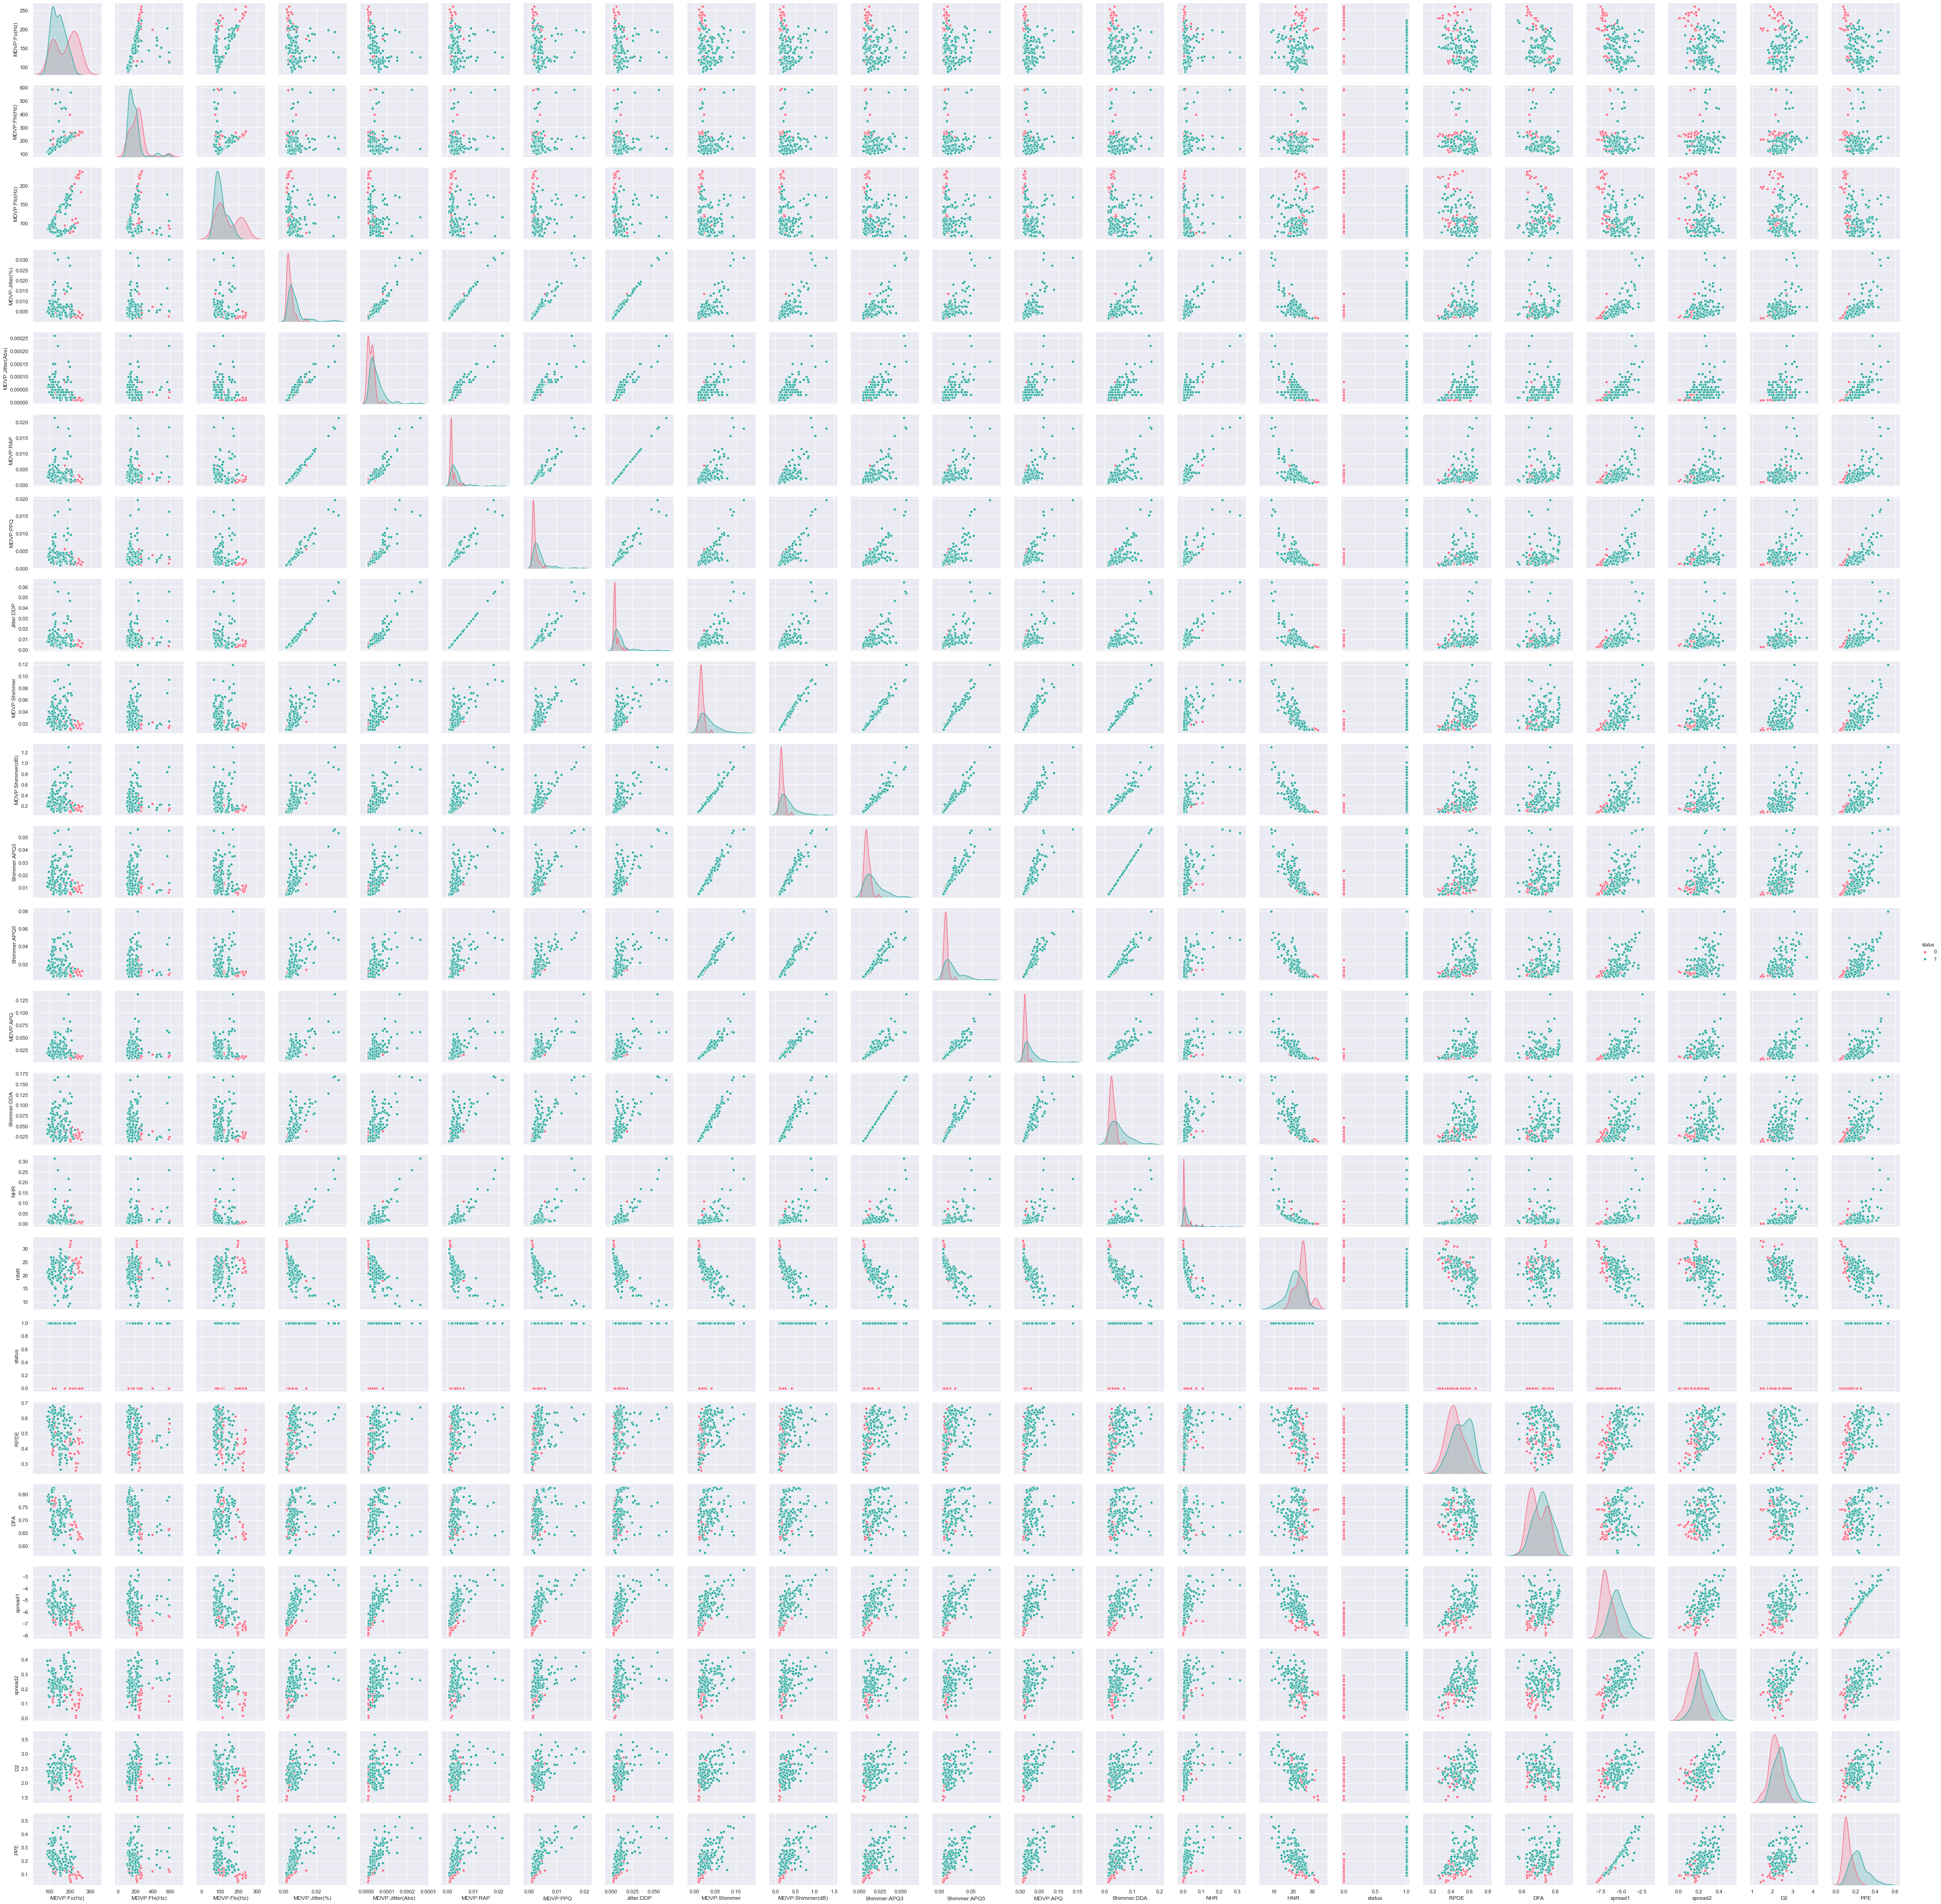

In [59]:
sns.pairplot(parkinson_df_updated, hue="status", palette="husl")

In [60]:
parkinson_df_updated.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

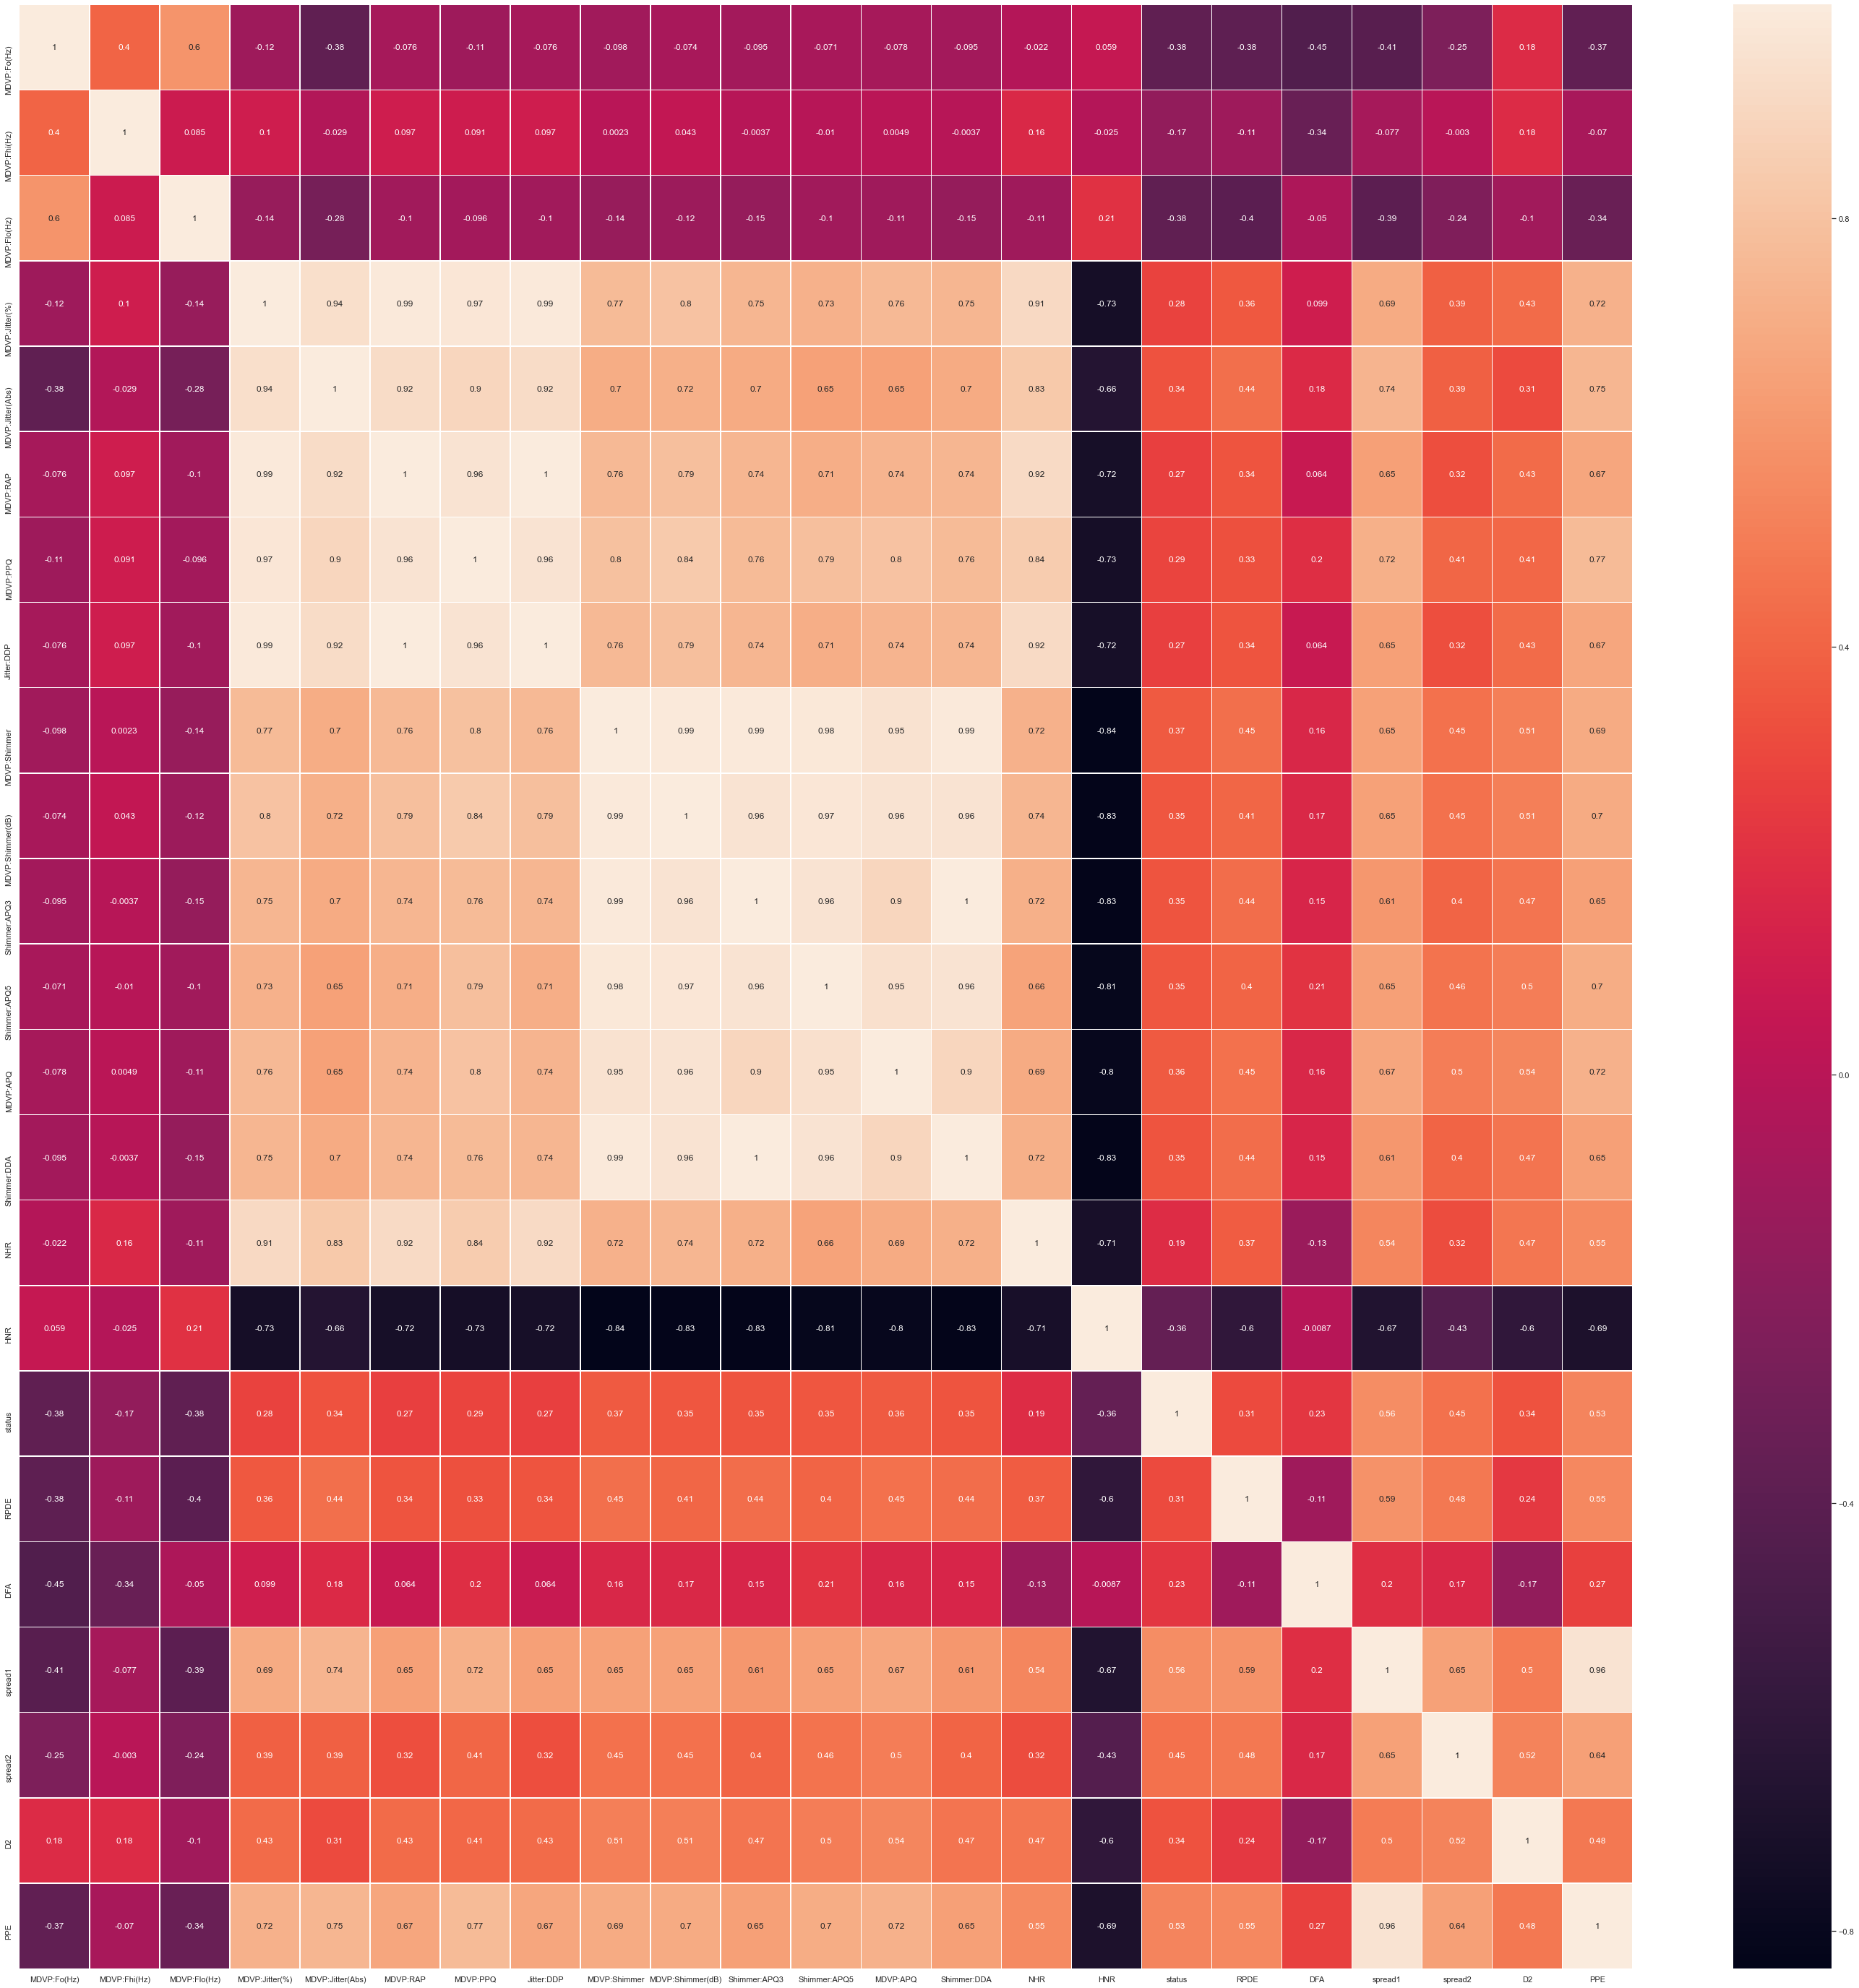

In [61]:
plt.figure(figsize = (50,50))
sns.heatmap(parkinson_df_updated.corr(), annot = True, linewidths=.5)

<font color=blue>__We can observe the highest correlation between variables like MDVP:PPQ,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,Jitter:DDP,MDVP:Shimmer e.t.c from the above heatmap__</font>

In [62]:
correlation_values=parkinson_df_updated.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

<font color=blue>Above is the correlation values with respect to status variable in descending order.</font>

## 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test) 

In [11]:
Y = parkinson_df_updated["status"]
X = parkinson_df_updated.drop(["status"],axis=1)

X_Train,X_Test,Y_Train,Y_Test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc

In [12]:
X_Train.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
42       237.226       247.326       225.227         0.00298   
17       168.778       232.181        75.603         0.00718   
5        120.552       131.162       113.787         0.00968   
120      128.940       479.697        88.251         0.00581   
98       125.791       140.557        96.206         0.01378   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
42            0.00001   0.00169   0.00182     0.00507       0.01752   
17            0.00004   0.00284   0.00387     0.00853       0.03327   
5             0.00008   0.00463   0.00750     0.01388       0.04701   
120           0.00005   0.00241   0.00314     0.00723       0.02008   
98            0.00011   0.00826   0.00655     0.02478       0.04689   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
42              0.164  ...   0.01133      0.03104  0.00740  22.736  0.305062   
17              0.348  ...   0.03430      0.04322  0.02919  20.376  0.631099   
5               0.456  ...   0.03243      0.06985  0.01222  21.378  0.415564   
120             0.221  ...   0.01734      0.02548  0.02350  24.743  0.487756   
98              0.422  ...   0.03908      0.07625  0.10323  15.433  0.571010   

          DFA   spread1   spread2        D2       PPE  
42   0.654172 -7.310550  0.098648  2.416838  0.095032  
17   0.605417 -2.931070  0.434326  3.007463  0.430788  
5    0.825069 -4.242867  0.299111  2.187560  0.357775  
120  0.684130 -6.186128  0.279933  2.686240  0.152428  
98   0.690892 -5.159169  0.202146  2.441612  0.260375  

[5 rows x 22 columns]

In [13]:
Y_Train.head()

42     0
17     1
5      1
120    1
98     1
Name: status, dtype: int64

In [14]:
X_Train.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [15]:
Y_Train.isna().sum()

0

<font color=blue>No Null values found in training set's both dependent and independent variable values.</font>

In [17]:
X_Train_Scaled=X_Train.apply(zscore)
X_Train_Scaled.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
42      2.071987      0.704683      2.531684       -0.656847   
17      0.393186      0.521833     -1.017379        0.117749   
5      -0.789636     -0.697798     -0.111659        0.578818   
120    -0.583907      3.510164     -0.717370       -0.134917   
98     -0.661141     -0.584369     -0.528678        1.334970   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
42          -0.951712 -0.549393 -0.592247   -0.549480     -0.693465   
17          -0.158781 -0.203590  0.074440   -0.202685      0.086360   
5            0.898461  0.334659  1.254964    0.333544      0.766664   
120          0.105530 -0.332890 -0.162965   -0.332984     -0.566713   
98           1.691393  1.426193  0.946012    1.426049      0.760723   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
42          -0.646917  ... -0.775119    -0.579044 -0.441596  0.260554   
17           0.220167  ...  0.468377    -0.203127  0.042715 -0.261188   
5            0.729107  ...  0.367143     0.618767 -0.334465 -0.039669   
120         -0.378310  ... -0.449764    -0.750645 -0.083752  0.704257   
98           0.568885  ...  0.727145     0.816294  1.688352 -1.353974   

         RPDE       DFA   spread1   spread2        D2       PPE  
42  -1.793650 -1.236734 -1.540511 -1.503402  0.058171 -1.271526  
17   1.191042 -2.141119  2.495712  2.479394  1.572975  2.423329  
5   -0.782064  1.933334  1.286732  0.875077 -0.529869  1.619851  
120 -0.121185 -0.681026 -0.504219  0.647532  0.749119 -0.639907  
98   0.640960 -0.555594  0.442248 -0.275406  0.121710  0.548005  

[5 rows x 22 columns]

## 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

### Logistic Regression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predict = logmodel.predict(X_Test)
predictProb = logmodel.predict_proba(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predict)
print(acc)

0.8135593220338984


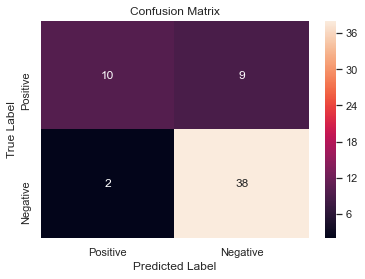

In [70]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [71]:
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           0       0.83      0.53      0.65        19
           1       0.81      0.95      0.87        40

    accuracy                           0.81        59
   macro avg       0.82      0.74      0.76        59
weighted avg       0.82      0.81      0.80        59



### K-NN Model

In [72]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [73]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)
    
    # Predict the response
    Y_Pred = knn.predict(X_Test)
    
    # Evaluate accuracy
    scores = accuracy_score(Y_Test, Y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


In [74]:
knn = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric = 'euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.8305084745762712


Text(0, 0.5, 'Misclassification Error')

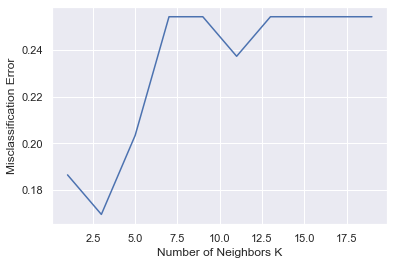

In [75]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

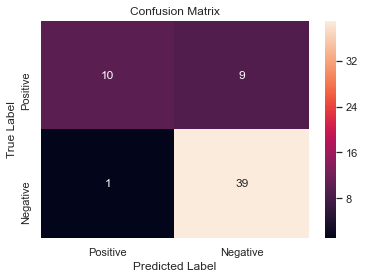

In [76]:
# Confusion Matrix
cm1 = confusion_matrix(Y_Test, predicted)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [77]:

# Classification Report
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.81      0.97      0.89        40

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59



### Naive Bayes’

In [78]:
# Model
naive_model = GaussianNB()
naive_model.fit(X_Train, Y_Train)

prediction = naive_model.predict(X_Test)
naive_model.score(X_Test,Y_Test)

0.711864406779661

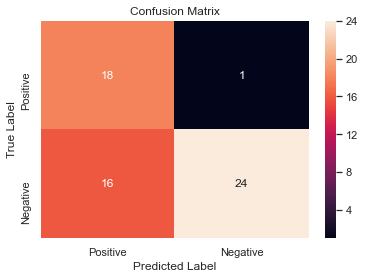

In [79]:
# Confusion Matrix
cm2 = confusion_matrix(Y_Test, prediction)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [80]:
print(classification_report(Y_Test, prediction))

              precision    recall  f1-score   support

           0       0.53      0.95      0.68        19
           1       0.96      0.60      0.74        40

    accuracy                           0.71        59
   macro avg       0.74      0.77      0.71        59
weighted avg       0.82      0.71      0.72        59



### SVM

In [81]:
svc = SVC()
svc.fit(X_Train, Y_Train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_Train, Y_Train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_Test, Y_Test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.73


In [82]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_Train)
X_test_scaled = scaler.fit_transform(X_Test)

In [83]:
svc = SVC()
svc.fit(X_train_scaled, Y_Train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, Y_Train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, Y_Test)))

Accuracy on training set: 0.79
Accuracy on test set: 0.68


In [84]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, Y_Train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, Y_Train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, Y_Test)))

Accuracy on training set: 0.949
Accuracy on test set: 0.831


# 7. Train a meta-classifier and note the accuracy on test data

## Build Decision Tree Model

In [85]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [86]:
print(dTree.score(X_Train, Y_Train))
print(dTree.score(X_Test, Y_Test))

1.0
0.847457627118644


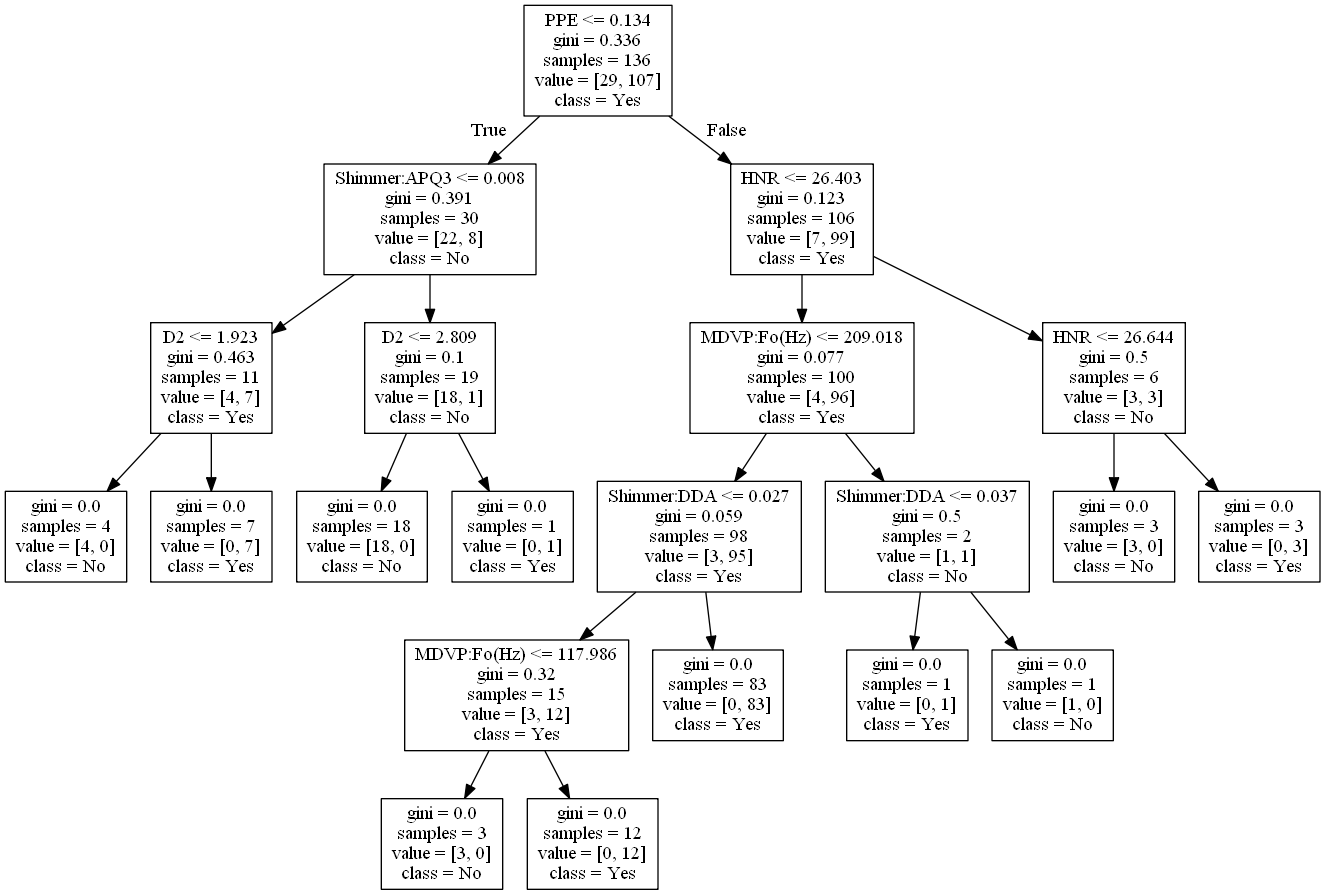

In [87]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('decision_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_Train), class_names = list(train_char_label))
Credit_Tree_File.close()

from os import system
retCode = system("dot -Tpng decision_tree.dot -o decision_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("decision_tree.png"))

## Reducing over fitting (Regularization)

In [88]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_Train, Y_Train)
print(dTreeR.score(X_Train, Y_Train))
print(dTreeR.score(X_Test, Y_Test))

0.9705882352941176
0.7796610169491526


In [89]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('decision_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_Train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng decision_treeR.dot -o decision_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("decision_treeR.png"))


<font color=blue>__Note__: Didn't observe any improvement with regularization with max_depth of 3. So I am using dTree only for further analysis instead of dTreeR.</font>

In [90]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_Train.columns).sort_values(by="Imp",ascending=False))

                       Imp
PPE               0.456333
D2                0.153085
MDVP:Fo(Hz)       0.124115
HNR               0.118238
Shimmer:APQ3      0.104042
Shimmer:DDA       0.044186
MDVP:Jitter(%)    0.000000
MDVP:Flo(Hz)      0.000000
spread2           0.000000
spread1           0.000000
DFA               0.000000
RPDE              0.000000
NHR               0.000000
MDVP:APQ          0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:Fhi(Hz)      0.000000
MDVP:Shimmer(dB)  0.000000
MDVP:Shimmer      0.000000
Jitter:DDP        0.000000
MDVP:PPQ          0.000000
MDVP:RAP          0.000000
Shimmer:APQ5      0.000000


In [91]:
print(dTree.score(X_Test , Y_Test))
y_predict = dTree.predict(X_Test)

cm=metrics.confusion_matrix(Y_Test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.847457627118644


# 8. Train at least one standard Ensemble model - Random forest, Bagging,Boosting etc, and note the accuracy

### Ensemble Learning - Bagging

In [92]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_Train, Y_Train)

0.8305084745762712


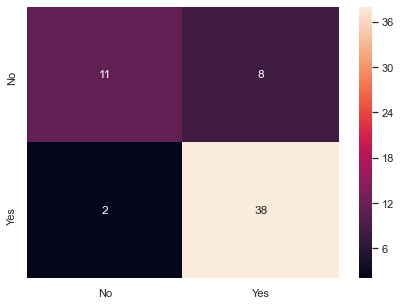

In [93]:
y_predict = bgcl.predict(X_Test)

print(bgcl.score(X_Test , Y_Test))

cm=metrics.confusion_matrix(Y_Test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Ensemble Learning - AdaBoosting

In [94]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_Train, Y_Train)

0.8305084745762712


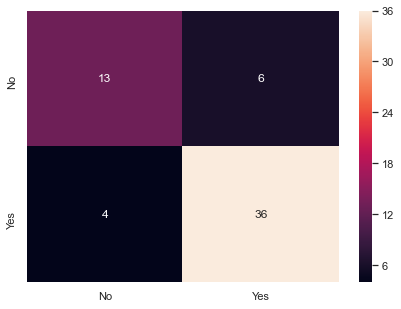

In [95]:
y_predict = abcl.predict(X_Test)
print(abcl.score(X_Test , Y_Test))

cm=metrics.confusion_matrix(Y_Test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Ensemble Learning - GradientBoost

In [96]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_Train, Y_Train)

In [97]:
y_predict = gbcl.predict(X_Test)
print(gbcl.score(X_Test, Y_Test))
cm=metrics.confusion_matrix(Y_Test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8813559322033898


### Ensemble RandomForest Classifier

In [98]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=6)
rfcl = rfcl.fit(X_Train, Y_Train)

In [99]:
y_predict = rfcl.predict(X_Test)
print(rfcl.score(X_Test, Y_Test))
cm=metrics.confusion_matrix(Y_Test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.864406779661017


## 9. Compare all the models and pick the best one among them 

<font color=blue>__Note__: Here I am using same Model Parametes for comparison after tuning them with different values previously like n_neighbours for KNN, C=1000 for SVC and max_features=6 for RandomForest Classifier. Here I am going to compare all the Models with different data sets like Train, Test and All. I am going to do this comparison with both the scenarios of without Feature Scaling and with Feature Scaling.</font>

### Models Comparison without Feature Scaling

KNN: 0.875275 (0.074045)
LR: 0.874725 (0.067598)
NB: 0.692308 (0.118890)
SVM: 0.808242 (0.123215)
DT: 0.898352 (0.080011)
BA: 0.853297 (0.063463)
AB: 0.853846 (0.078408)
GB: 0.897253 (0.080642)
RF: 0.897253 (0.049209)


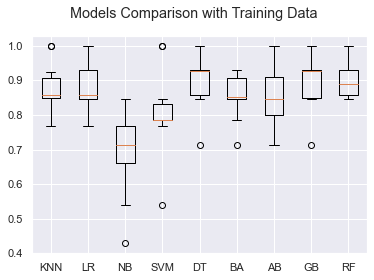

KNN: 0.703333 (0.225807)
LR: 0.753333 (0.218174)
NB: 0.723333 (0.185622)
SVM: 0.720000 (0.228619)
DT: 0.770000 (0.204097)
BA: 0.786667 (0.227645)
AB: 0.803333 (0.224326)
GB: 0.830000 (0.105883)
RF: 0.803333 (0.224326)


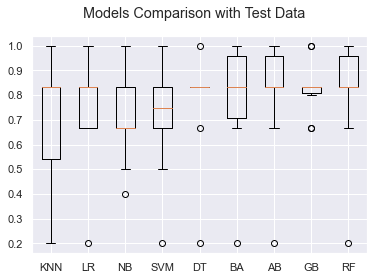

KNN: 0.706316 (0.167113)
LR: 0.807895 (0.187921)
NB: 0.674737 (0.239734)
SVM: 0.717368 (0.257218)
DT: 0.767368 (0.167754)
BA: 0.788158 (0.197870)
AB: 0.735789 (0.205476)
GB: 0.809474 (0.188272)
RF: 0.788421 (0.196543)


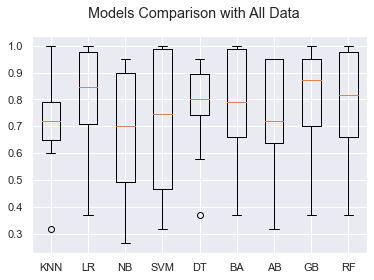

In [100]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric = 'euclidean')))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('BA', BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)))
models.append(('AB', AdaBoostClassifier(n_estimators=10, random_state=1)))
models.append(('GB', GradientBoostingClassifier(n_estimators = 50,random_state=1)))
models.append(('RF', RandomForestClassifier(n_estimators = 50, random_state=1,max_features=6)))

# Evaluate each model with training data
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Models Comparison with Training Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Evaluate each model with testing data
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X_Test, Y_Test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Models Comparison with Test Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Evaluate each model with all data
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Models Comparison with All Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Models Comparison with Feature Scaling using StandardScalar

S_KNN: 0.889560 (0.076033)
S_LR: 0.853846 (0.079441)
S_NB: 0.699451 (0.126207)
S_SVM: 0.910440 (0.066529)
S_DT: 0.869231 (0.094333)
S_BA: 0.853297 (0.063463)
S_AB: 0.853846 (0.078408)
S_GB: 0.897253 (0.080642)
S_RF: 0.897253 (0.049209)


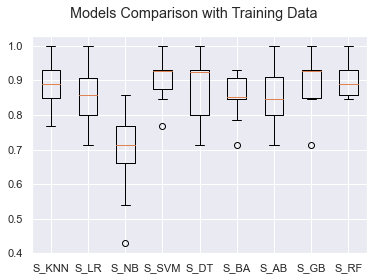

S_KNN: 0.736667 (0.204641)
S_LR: 0.740000 (0.154776)
S_NB: 0.690000 (0.161280)
S_SVM: 0.840000 (0.180616)
S_DT: 0.806667 (0.178761)
S_BA: 0.786667 (0.227645)
S_AB: 0.803333 (0.224326)
S_GB: 0.830000 (0.105883)
S_RF: 0.803333 (0.224326)


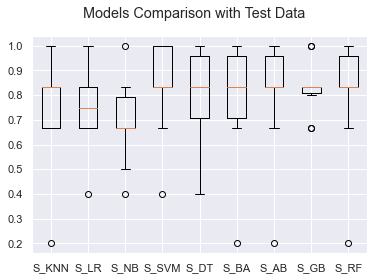

S_KNN: 0.753158 (0.177056)
S_LR: 0.781579 (0.214767)
S_NB: 0.669474 (0.223307)
S_SVM: 0.783947 (0.123058)
S_DT: 0.768421 (0.189689)
S_BA: 0.788158 (0.197870)
S_AB: 0.735789 (0.205476)
S_GB: 0.809474 (0.188272)
S_RF: 0.788421 (0.196543)


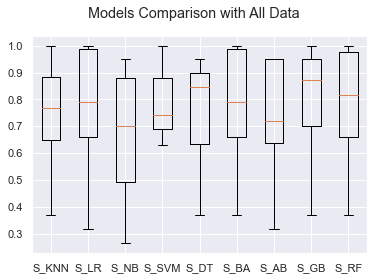

In [101]:
pipelines=[]
pipelines.append(('S_KNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric = 'euclidean'))])))
pipelines.append(('S_LR',Pipeline([('scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('S_NB',Pipeline([('scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('S_SVM',Pipeline([('scaler',StandardScaler()),('SVM',SVC(C=1000))])))
pipelines.append(('S_DT',Pipeline([('scaler',StandardScaler()),('DT',DecisionTreeClassifier())])))
pipelines.append(('S_BA',Pipeline([('scaler',StandardScaler()),('BA',BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1))])))
pipelines.append(('S_AB',Pipeline([('scaler',StandardScaler()),('AB',AdaBoostClassifier(n_estimators=10, random_state=1))])))
pipelines.append(('S_GB',Pipeline([('scaler',StandardScaler()),('GB',GradientBoostingClassifier(n_estimators = 50,random_state=1))])))
pipelines.append(('S_RF',Pipeline([('scaler',StandardScaler()),('RF',RandomForestClassifier(n_estimators = 50, random_state=1,max_features=6))])))


# Evaluate each model with training data
results = []
names = []
scoring = 'accuracy'
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Models Comparison with Training Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Evaluate each model with testing data
results = []
names = []
scoring = 'accuracy'
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X_Test, Y_Test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Models Comparison with Test Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Evaluate each model with all data
results = []
names = []
scoring = 'accuracy'
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Models Comparison with All Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### <font color=blue>Summary</font>

- <font color=blue>From the above observations with different data sets and with different algorithms, __Gradient Boosting__ is consistently having high accuracy compare to other algorithms.</font>
- <font color=blue>__Logistic Regression__, __Decision Tree__, __SVM__ and __Random Forest__ also scores good with some of the data sets.</font>
- <font color=blue>__Naive Bayes’__ scores less compare to other models in many scenarios.</font>